# Import

In [381]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Importam Decision Tree Classifier
from sklearn.model_selection import train_test_split # Importam train_test_split function
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer


# Data Overview

In [382]:
data =pd.read_csv('Baza de date iteratia 1.csv')

In [383]:
data.head()

,Age,Astm,Alergii /Intoler 1/2,Eo\n%/val,Fumator,Gen,Initial SNOT,Preop HPQ-9,Lund-Mackay,Endoscopy score,mir 125,mir 203,SNOT 6 luni,HPQ-9 6 luni,POSE 6 luni,SNOT 1 an,HPQ-9 1 an,POSE 1 an,Tratament postop
0,74,0,0,1.70,0,0,44,7,14,4,1.80,0.19,2,4,4,2,2,0,1
1,56,0,0,0.00,0,0,16,12,22,6,2.70,0.32,13,9,5,46,10,8,1
2,61,1,1,0.00,0,1,11,2,12,3,1.11,0.53,0,0,1,0,0,0,1
3,53,1,2,0.00,0,1,67,5,22,6,2.39,0.50,19,3,5,29,3,6,1
4,52,0,1,0.64,0,1,24,3,19,5,0.97,0.83,2,2,6,5,3,13,0


In [384]:
# Facem medita dintre valorile celor doua valori pentru celoe doua nari
data['Lund-Mackay']=data['Lund-Mackay']/2
data['Endoscopy score']=data['Endoscopy score']/2
data['POSE 6 luni']=data['POSE 6 luni']/2
data['POSE 1 an']=data['POSE 1 an']/2

In [385]:
# Definim coloanele pe care dorim sa le transformam in int
columns_to_convert = ['Age', 'Astm', 'Alergii /Intoler 1/2', 'Fumator', 'Gen', 'Preop HPQ-9', 
                      'SNOT 6 luni', 'HPQ-9 6 luni', 
                     'HPQ-9 1 an', 'Tratament postop', 'POSE 6 luni', 'POSE 1 an']

# Campurile care nu au valori le puem valoarea 0
data[columns_to_convert] = data[columns_to_convert].fillna(0)

# Convert columns to integers
data[columns_to_convert] = data[columns_to_convert].astype(int)
data.drop(data.index[-1], inplace=True)

# Incadram POSE in intervale

Intervale pentru POSE:

* 0-3 – scazut 1
* 4-7 – mediu 2
* 8-11 mare 3
* 12-15 foarte mare 4

In [386]:
def modify_column(column):
    modified_column = []
    for value in column:
        if value >= 0 and value <= 3:
            modified_column.append(1)
        elif value >= 4 and value <= 7:
            modified_column.append(2)
        elif value >= 8 and value <= 11:
            modified_column.append(3)
        else:
            modified_column.append(4)
      
    return modified_column
data['POSE 6 luni'] = modify_column(data['POSE 6 luni'])
data['POSE 1 an'] = modify_column(data['POSE 1 an'])

In [387]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   79 non-null     int32  
 1   Astm                  79 non-null     int32  
 2   Alergii /Intoler 1/2  79 non-null     int32  
 3   Eo
%/val              79 non-null     float64
 4   Fumator               79 non-null     int32  
 5   Gen                   79 non-null     int32  
 6   Initial SNOT          79 non-null     int64  
 7   Preop HPQ-9           79 non-null     int32  
 8   Lund-Mackay           79 non-null     float64
 9   Endoscopy score       79 non-null     float64
 10  mir 125               79 non-null     float64
 11  mir 203               79 non-null     float64
 12  SNOT 6 luni           79 non-null     int32  
 13  HPQ-9 6 luni          79 non-null     int32  
 14  POSE 6 luni           79 non-null     int64  
 15  SNOT 1 an             79 

,Age,Astm,Alergii /Intoler 1/2,Eo\n%/val,Fumator,Gen,Initial SNOT,Preop HPQ-9,Lund-Mackay,Endoscopy score,mir 125,mir 203,SNOT 6 luni,HPQ-9 6 luni,POSE 6 luni,SNOT 1 an,HPQ-9 1 an,POSE 1 an,Tratament postop
0,74,0,0,1.70,0,0,44,7,7.0,2.0,1.80,0.19,2,4,1,2,2,1,1
1,56,0,0,0.00,0,0,16,12,11.0,3.0,2.70,0.32,13,9,1,46,10,2,1
2,61,1,1,0.00,0,1,11,2,6.0,1.5,1.11,0.53,0,0,1,0,0,1,1
3,53,1,2,0.00,0,1,67,5,11.0,3.0,2.39,0.50,19,3,1,29,3,1,1
4,52,0,1,0.64,0,1,24,3,9.5,2.5,0.97,0.83,2,2,1,5,3,2,0


In [388]:
data['POSE 6 luni'].describe()

count    79.000000
mean      1.417722
std       0.632609
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       4.000000
Name: POSE 6 luni, dtype: float64

In [389]:
data['POSE 1 an'].describe()

count    79.000000
mean      1.607595
std       0.791262
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       4.000000
Name: POSE 1 an, dtype: float64

In [390]:
data.describe()

,Age,Astm,Alergii /Intoler 1/2,Eo\n%/val,Fumator,Gen,Initial SNOT,Preop HPQ-9,Lund-Mackay,Endoscopy score,mir 125,mir 203,SNOT 6 luni,HPQ-9 6 luni,POSE 6 luni,SNOT 1 an,HPQ-9 1 an,POSE 1 an,Tratament postop
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,49.658228,0.316456,0.544304,0.256316,0.227848,0.354430,46.177215,5.278481,8.177215,2.113924,1.522911,0.467089,17.784810,3.518987,1.417722,23.924051,3.759494,1.607595,0.455696
std,12.283913,0.468065,0.764559,0.351855,0.422124,0.481397,20.720212,3.785725,1.995248,0.650194,1.150575,0.295189,17.612402,3.245750,0.632609,18.179146,3.134650,0.791262,0.501216
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,4.000000,1.000000,0.210000,0.040000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.500000,2.000000,6.500000,1.500000,0.880000,0.250000,5.000000,1.000000,1.000000,10.000000,1.000000,1.000000,0.000000
50%,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,5.000000,8.000000,2.000000,1.160000,0.400000,13.000000,3.000000,1.000000,20.000000,3.000000,1.000000,0.000000
75%,57.500000,1.000000,1.000000,0.493000,0.000000,1.000000,61.000000,7.500000,10.000000,2.500000,1.895000,0.615000,21.500000,5.000000,2.000000,36.000000,6.000000,2.000000,1.000000
max,80.000000,1.000000,2.000000,1.700000,1.000000,1.000000,99.000000,14.000000,12.000000,3.000000,7.940000,1.730000,73.000000,14.000000,4.000000,75.000000,13.000000,4.000000,1.000000


In [391]:
# Verificam daca avem valori nule
data.isna().sum()

Age                     0
Astm                    0
Alergii /Intoler 1/2    0
Eo\n%/val               0
Fumator                 0
Gen                     0
Initial SNOT            0
Preop HPQ-9             0
Lund-Mackay             0
Endoscopy score         0
mir 125                 0
mir 203                 0
SNOT 6 luni             0
HPQ-9 6 luni            0
POSE 6 luni             0
SNOT 1 an               0
HPQ-9 1 an              0
POSE 1 an               0
Tratament postop        0
dtype: int64

C:\Users\eu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


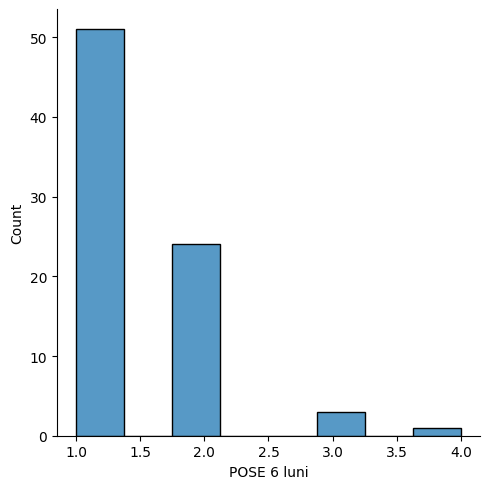

In [392]:
#histogram
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.displot(data['POSE 6 luni'])

C:\Users\eu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


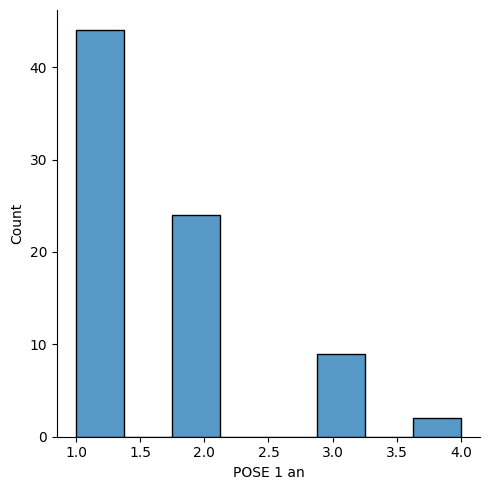

In [393]:
#histogram
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.displot(data['POSE 1 an'])

In [394]:
#Vizualizare pentru fiecare coloana ce valori unice are
for col in data.columns:
    print("-------------------------------")
    print(f'Column name: {col}\n')
    print(f'Unique values:\n{data[col].unique()}\n\n')

-------------------------------
Column name: Age

Unique values:
[74 56 61 53 52 34 63 50 36 60 42 37 68 41 47 70 46 59 64 32 54 43 65 18
 51 40 44 62 39 55 29 45 66 71 35 48 76 80]


-------------------------------
Column name: Astm

Unique values:
[0 1]


-------------------------------
Column name: Alergii /Intoler 1/2

Unique values:
[0 1 2]


-------------------------------
Column name: Eo
%/val

Unique values:
[1.7   0.    0.64  0.53  0.89  0.36  0.78  0.37  0.88  0.567 0.765 0.582
 0.344 0.855 0.404 0.554 0.402 0.809 0.752 0.329 0.879 0.389 0.583 0.388
 0.721 0.633 0.432 0.456 0.385 0.311 0.358 0.921]


-------------------------------
Column name: Fumator

Unique values:
[0 1]


-------------------------------
Column name: Gen

Unique values:
[0 1]


-------------------------------
Column name: Initial SNOT

Unique values:
[44 16 11 67 24 72 34 50 39 36 85 31 62 66 75 99 30 41 61 55 58 38 54 27
 78 28 32 97 35 17 47 84 19 70 49 26 33 52 60 48 73 46 65 57 63 25 45 22
 29 43 64]



# Vizualization

**Vizualizam datele pentru a determina daca exista outliers.**

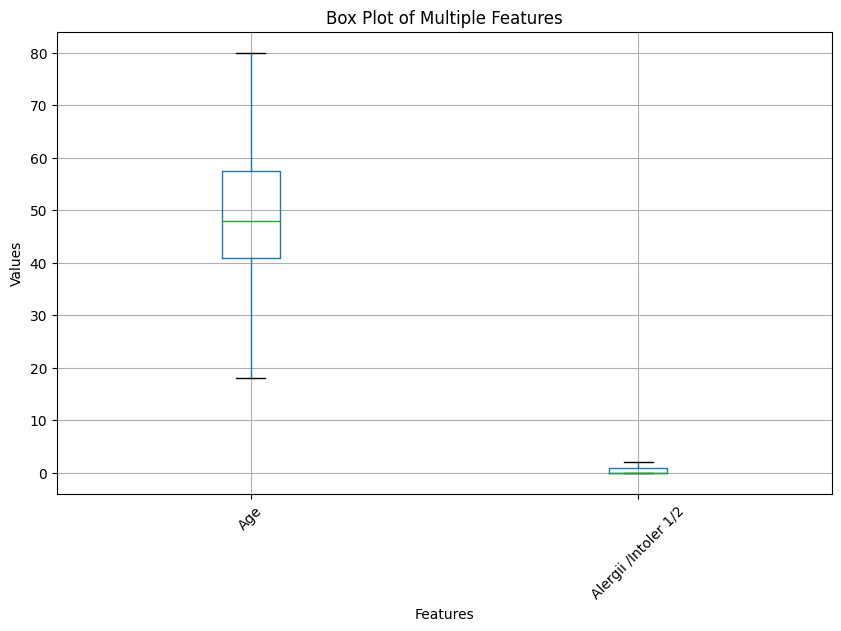

In [395]:
dataForVizualization =['Age', 'Alergii /Intoler 1/2']
plt.figure(figsize=(10, 6))
data[dataForVizualization].boxplot()
plt.title('Box Plot of Multiple Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

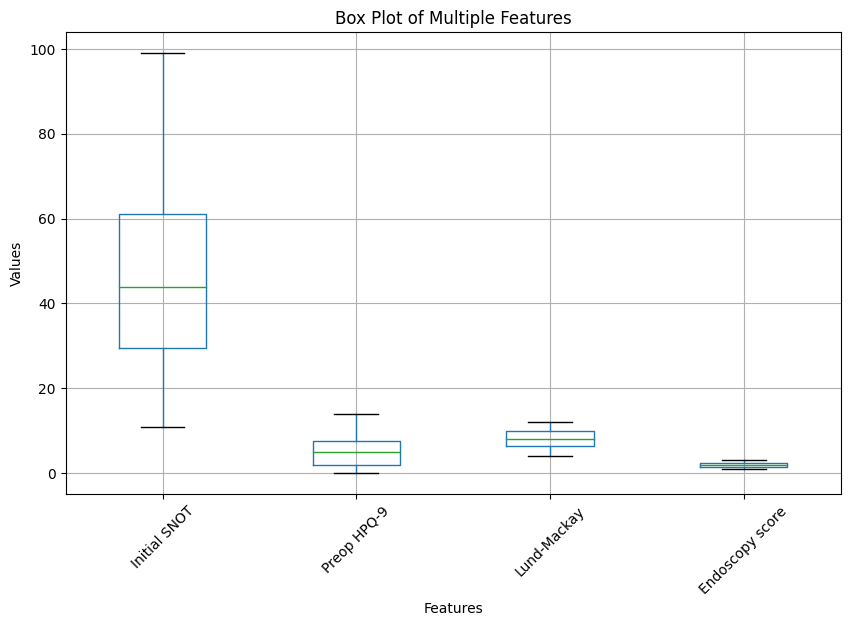

In [396]:
dataForVizualization =['Initial SNOT', 'Preop HPQ-9', 'Lund-Mackay', 'Endoscopy score']
plt.figure(figsize=(10, 6))
data[dataForVizualization].boxplot()
plt.title('Box Plot of Multiple Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

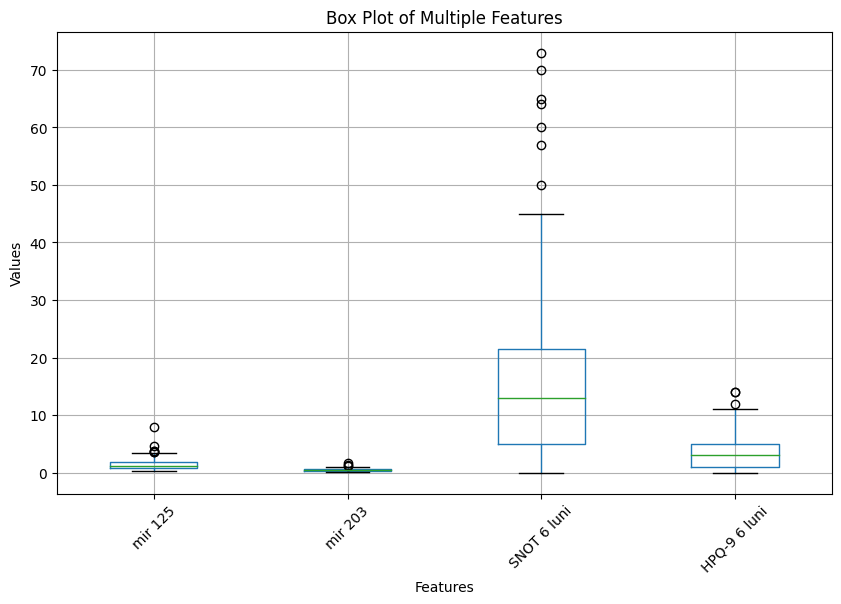

In [397]:
dataForVizualization =['mir 125', 'mir 203', 'SNOT 6 luni', 'HPQ-9 6 luni']
plt.figure(figsize=(10, 6))
data[dataForVizualization].boxplot()
plt.title('Box Plot of Multiple Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

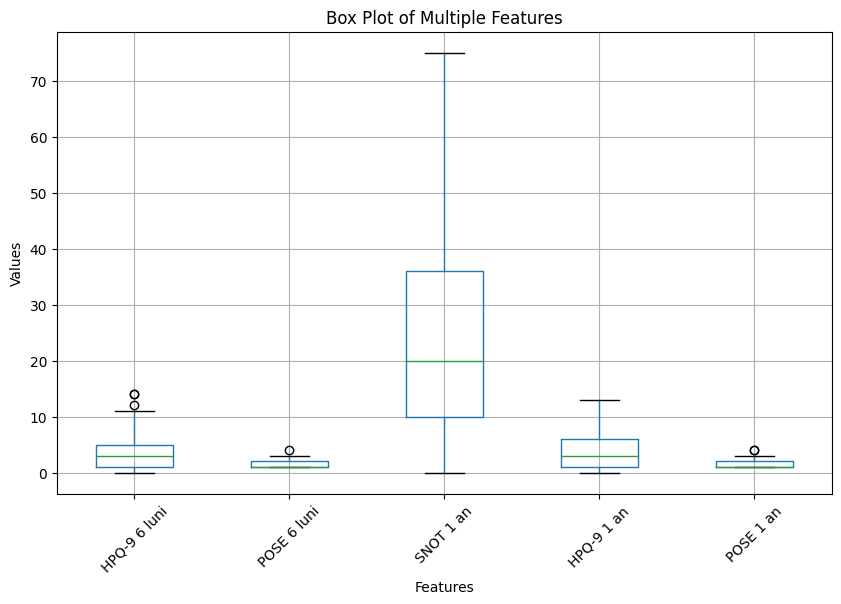

In [398]:
dataForVizualization =['HPQ-9 6 luni', 'POSE 6 luni', 'SNOT 1 an', 'HPQ-9 1 an', 'POSE 1 an' ]
plt.figure(figsize=(10, 6))
data[dataForVizualization].boxplot()
plt.title('Box Plot of Multiple Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [399]:
from sklearn.ensemble import IsolationForest
# Create DataFrame
df = pd.DataFrame(data)

# Columns to exclude outliers
columns_to_exclude_outliers = [ 'mir 125'
                               , 'mir 203','Initial SNOT', 'Preop HPQ-9', 'Lund-Mackay', 'Endoscopy score',
                               'Age', 'POSE 6 luni', 'POSE 1 an', 'Fumator', 'Gen', 'Tratament postop', 'Alergii /Intoler 1/2', 'Astm', 'Eo\n%/val'
                              ]

# Function to exclude outliers using Isolation Forest
def exclude_outliers(df, columns):
    # Initialize Isolation Forest model
    clf = IsolationForest(contamination=0.08, random_state=42)
    # Fit model to the data
    clf.fit(df[columns])
    # Predict outliers
    outlier_preds = clf.predict(df[columns])
    # Filter out non-outliers
    df_filtered = df[outlier_preds == 1]
    outliers = df[outlier_preds == -1]
    return outliers, df_filtered

# Exclude outliers
outliers, data = exclude_outliers(df, columns_to_exclude_outliers)

print("Outliers:")
print(outliers)

# Print non-outliers
print("\nNon-Outliers:")
print(data)

Outliers:
    Age  Astm  Alergii /Intoler 1/2  Eo\n%/val  Fumator  Gen  Initial SNOT  \
5    34     0                     1      0.000        1    0            72   
8    36     0                     0      0.890        1    0            39   
15   34     1                     1      0.000        1    0            99   
26   54     1                     2      0.567        1    1            78   
29   18     0                     1      0.765        0    1            54   
42   36     1                     2      0.809        0    1            72   
57   45     0                     0      0.633        0    1            73   

    Preop HPQ-9  Lund-Mackay  Endoscopy score  mir 125  mir 203  SNOT 6 luni  \
5            13          4.0              1.0     1.74     0.16           25   
8             5          6.5              1.5     3.54     1.73            1   
15           11          9.5              2.0     1.61     0.20            3   
26            1         11.0              3.0

# POSE 6 luni

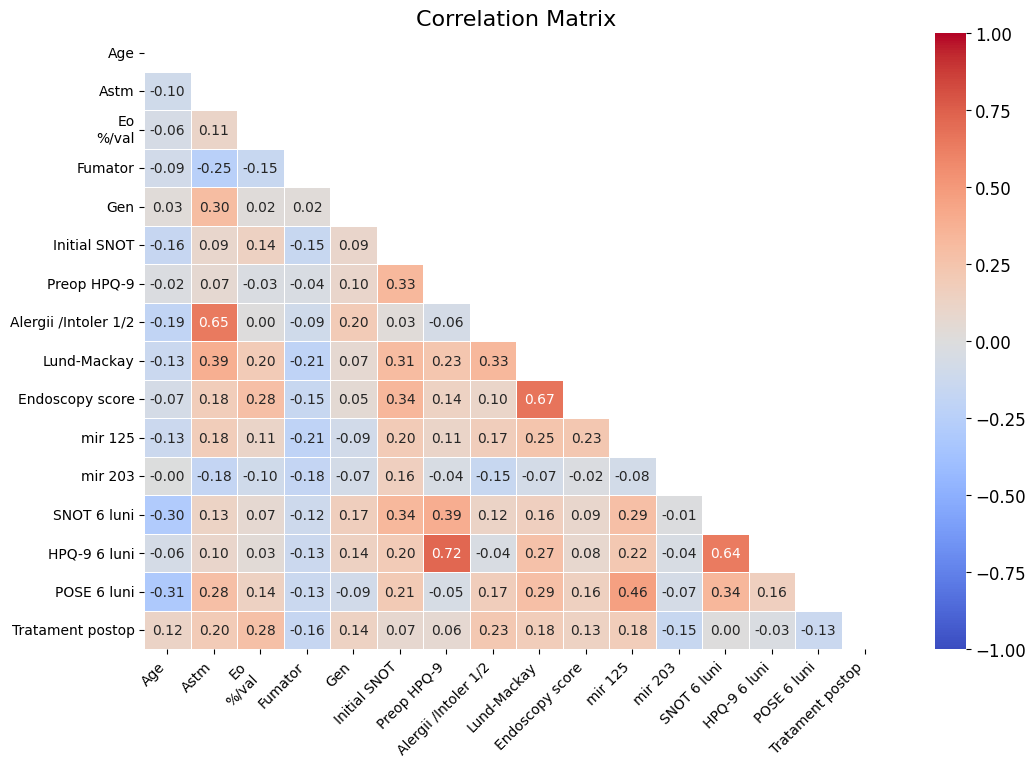

In [400]:
# Calculați matricea de corelație
corr_matrix = data[['Age', 'Astm', 'Eo\n%/val', 'Fumator', 'Gen', 'Initial SNOT', 'Preop HPQ-9', 'Alergii /Intoler 1/2',
                  'Lund-Mackay', 'Endoscopy score', 'mir 125', 'mir 203', 'SNOT 6 luni', 'HPQ-9 6 luni', 'POSE 6 luni', 'Tratament postop']].corr()

# Generați o mască(mask) pentru triunghiul superior
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Configurati matplotlib figure
plt.figure(figsize=(12, 8))

#Desenam heatmap cu masca și corelam raportul aspect ratio
heatmap = sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)

# Adaugam un titlu
plt.title('Correlation Matrix', fontsize=16)

# Rotitim etichetele pe axa x pentru o mai bună lizibilitate
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')

# Adaugam color bar
colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelsize=12)

# Vizualizare
#plt.tight_layout()
plt.show()

Un coeficient de corelație apropiat de 1 indică o corelație pozitivă puternică. Aceasta înseamnă că, pe măsură ce o variabilă crește, cealaltă variabilă tinde să crească, de asemenea, și invers. Un coeficient de corelație apropiat de -1 indică o corelație negativă puternică. Aceasta înseamnă că, pe măsură ce o variabilă crește, cealaltă variabilă tinde să scadă și invers. Un coeficient de corelație apropiat de 0 indică o relație liniară mică sau deloc între variabile.

**ML pentru Pose 6 luni**
Vom folosi urmatoatele campuri:

* Age
* Astm
* Alergii /Intoler 1/2
* Eo %/val
* Fumator
* Gen
* Initial SNOT
* Preop HPQ-9
* Lund-Mackay
* Endoscopy score
* mir 125
* mir 203
* SNOT 6 luni
* HPQ-9 6 luni
* Tratament postop

Dintre aceste campuri vom elimina pe baza matricei de mai sus urmatoarele elemente:

* Alergii
* Preop-HPQ-9
* Endoscopy score
* Initial SNOT

# Decision Tree classifier

In [401]:
#împărțim setul de date în features si target variable
feature_cols =  ['Age', 'Astm', 'Eo\n%/val', 'Fumator', 'Gen', 'Initial SNOT', 'Preop HPQ-9',
                  'Lund-Mackay', 'mir 125', 'mir 203','Tratament postop']
X = data[feature_cols] # Features
y = data['POSE 6 luni'] # Target variable
# împărțim setul de date în training set si test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Cream Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
train = clf.predict(X_train)
print(y_pred)

[2 1 1 1 1 1 1 1 1 1 2 1 2 1 1 2 2 1 1 1 1 2]


In [402]:
dt_accuracy = accuracy_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred, average='weighted')
dt_recall = recall_score(y_test, y_pred, average='weighted')
dt_f1 = f1_score(y_test, y_pred, average='weighted')

# Afisarea rezultatelor
print("Performanta modelului de Arbori de Decizie:")
print(f"Acuratețe: {dt_accuracy:.2f}")
print(f"Precision: {dt_precision:.2f}")
print(f"Exhaustivitate: {dt_recall:.2f}")
print(f"Scor F1: {dt_f1:.2f}")

Performanta modelului de Arbori de Decizie:
Acuratețe: 0.82
Precision: 0.86
Exhaustivitate: 0.82
Scor F1: 0.83


In [403]:
dt_accuracy_scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
dt_precision_scores = cross_val_score(clf, X, y, cv=10, scoring='precision_weighted')
dt_recall_scores = cross_val_score(clf, X, y, cv=10, scoring='recall_weighted')
dt_f1_scores = cross_val_score(clf, X, y, cv=10, scoring='f1_weighted')

dt_accuracy_mean = dt_accuracy_scores.mean()
dt_precision_mean = dt_precision_scores.mean()
dt_recall_mean = dt_recall_scores.mean()
dt_f1_mean = dt_f1_scores.mean()

print(f"Acuratețe: {dt_accuracy_mean:.2f}")
print(f"Precizia: {dt_precision_mean:.2f}")
print(f"Exhaustivitate: {dt_recall_mean:.2f}")
print(f"Scor F1: {dt_f1_mean:.2f}\n")

Acuratețe: 0.63
Precizia: 0.68
Exhaustivitate: 0.60
Scor F1: 0.63



C:\Users\eu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\eu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\eu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\eu

In [404]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[15  3]
 [ 1  3]]


In [405]:
#Vizualizare predictii si valori reale
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
22,2,2
62,1,1
12,1,1
75,2,1
60,1,1
31,1,1
45,1,1
61,1,1
38,1,1
66,1,1


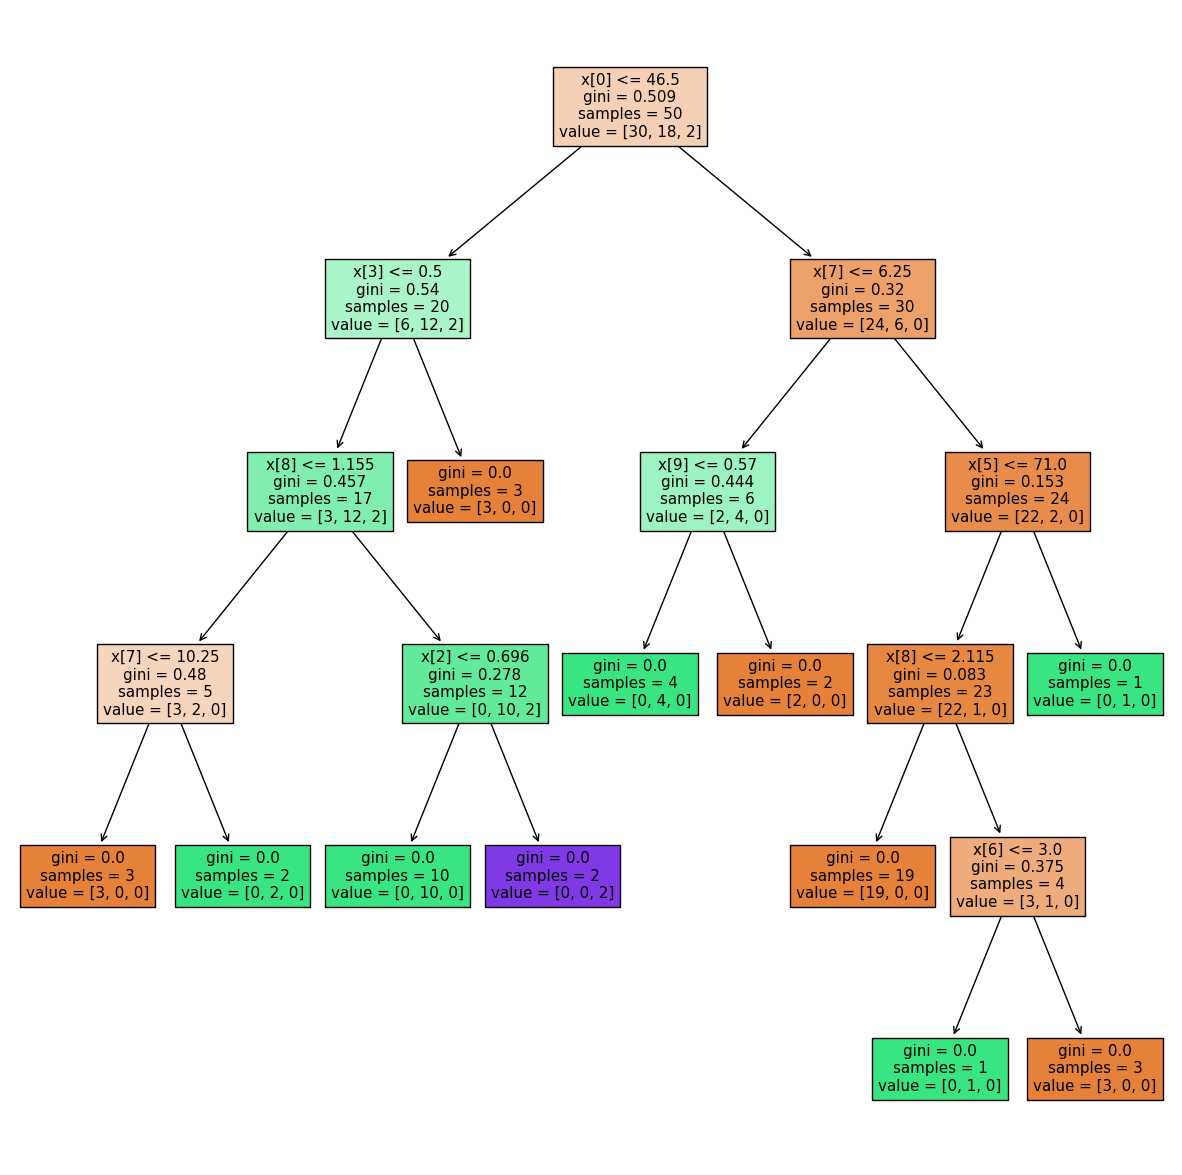

In [406]:
from sklearn import tree
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(clf, 
                  
                   filled=True)
fig.savefig("decistion_tree.png")

In [407]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Lund-Mackay         0.222746
Age                 0.198113
Eo\n%/val           0.131027
Fumator             0.119312
mir 203             0.104822
mir 125             0.096086
Initial SNOT        0.068932
Preop HPQ-9         0.058962
Astm                0.000000
Gen                 0.000000
Tratament postop    0.000000
dtype: float64

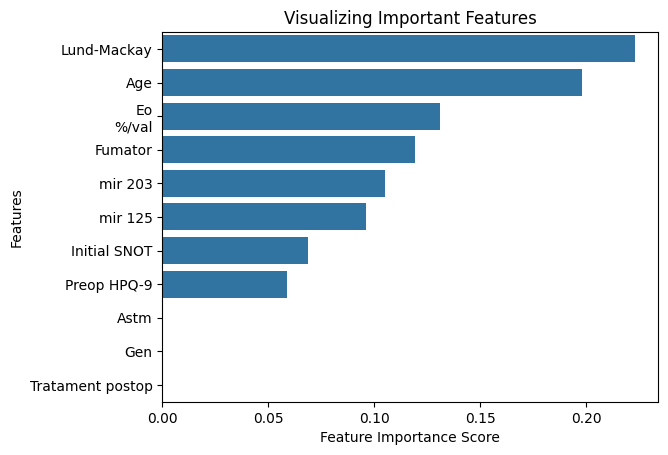

In [408]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)

# Adaugam labels

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

# Adaugam un titlu

plt.title("Visualizing Important Features")

# Visualizare

plt.show()

# Random Forest classifier

In [409]:
from sklearn.model_selection import KFold, cross_val_score
# Split the data into features (X) and target (y)
X = data[['Age', 'Astm', 'Eo\n%/val', 'Fumator', 'Gen', 'Initial SNOT', 'Preop HPQ-9',
                  'Lund-Mackay', 'mir 125', 'mir 203','Tratament postop']]  # Features
y = data['POSE 6 luni']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42) 
model.fit(X_train, y_train)

# Predict the target values for the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy score and classification report to evaluate the model

dt_accuracy = accuracy_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred, average='weighted')
dt_recall = recall_score(y_test, y_pred, average='weighted')
dt_f1 = f1_score(y_test, y_pred, average='weighted')

# Afisarea rezultatelor
print("Performanta modelului de Arbori de Decizie:")
print(f"Acuratețe: {dt_accuracy:.2f}")
print(f"Precision: {dt_precision:.2f}")
print(f"Exhaustivitate: {dt_recall:.2f}")
print(f"Scor F1: {dt_f1:.2f}")


print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))



Performanta modelului de Arbori de Decizie:
Acuratețe: 0.77
Precision: 0.75
Exhaustivitate: 0.77
Scor F1: 0.76

Classification Report:
              precision    recall  f1-score   support

           1       0.84      0.89      0.86        18
           2       0.33      0.25      0.29         4

    accuracy                           0.77        22
   macro avg       0.59      0.57      0.58        22
weighted avg       0.75      0.77      0.76        22



In [410]:
print("Performanta modelului de Arbori de Decizie cu Corss validation:")

dt_accuracy_scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
dt_precision_scores = cross_val_score(clf, X, y, cv=10, scoring='precision_weighted')
dt_recall_scores = cross_val_score(clf, X, y, cv=10, scoring='recall_weighted')
dt_f1_scores = cross_val_score(clf, X, y, cv=10, scoring='f1_weighted')

dt_accuracy_mean = dt_accuracy_scores.mean()
dt_precision_mean = dt_precision_scores.mean()
dt_recall_mean = dt_recall_scores.mean()
dt_f1_mean = dt_f1_scores.mean()

print(f"Acuratețe: {dt_accuracy_mean:.2f}")
print(f"Precizia: {dt_precision_mean:.2f}")
print(f"Exhaustivitate: {dt_recall_mean:.2f}")
print(f"Scor F1: {dt_f1_mean:.2f}\n")


Performanta modelului de Arbori de Decizie cu Corss validation:
Acuratețe: 0.64
Precizia: 0.68
Exhaustivitate: 0.63
Scor F1: 0.62



C:\Users\eu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\eu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\eu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\eu

In [411]:
# Get feature importance
feature_importance = model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
0,Age,0.149676
1,Astm,0.039553
2,Eo\n%/val,0.081375
3,Fumator,0.021285
4,Gen,0.019723
5,Initial SNOT,0.113422
6,Preop HPQ-9,0.066528
7,Lund-Mackay,0.124328
8,mir 125,0.184528
9,mir 203,0.158710


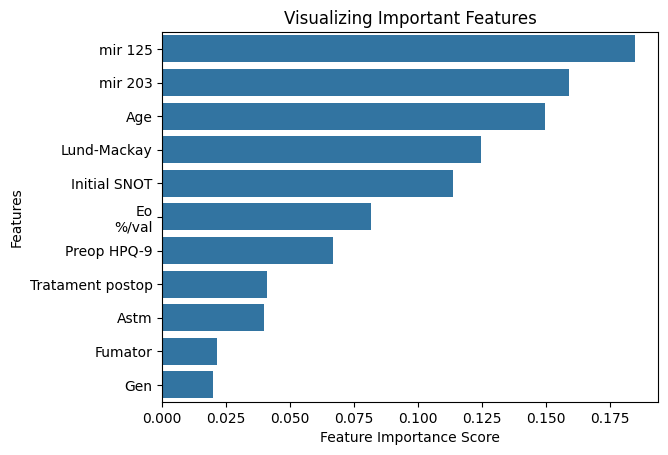

In [412]:
# Creating a seaborn bar plot

sns.barplot(y=feature_importance_df_sorted['Feature'], x=feature_importance_df_sorted['Importance'])

# Adaugam labels

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

# Adaugam un titlu

plt.title("Visualizing Important Features")

# Visualizare

plt.show()


# POSE 1 an

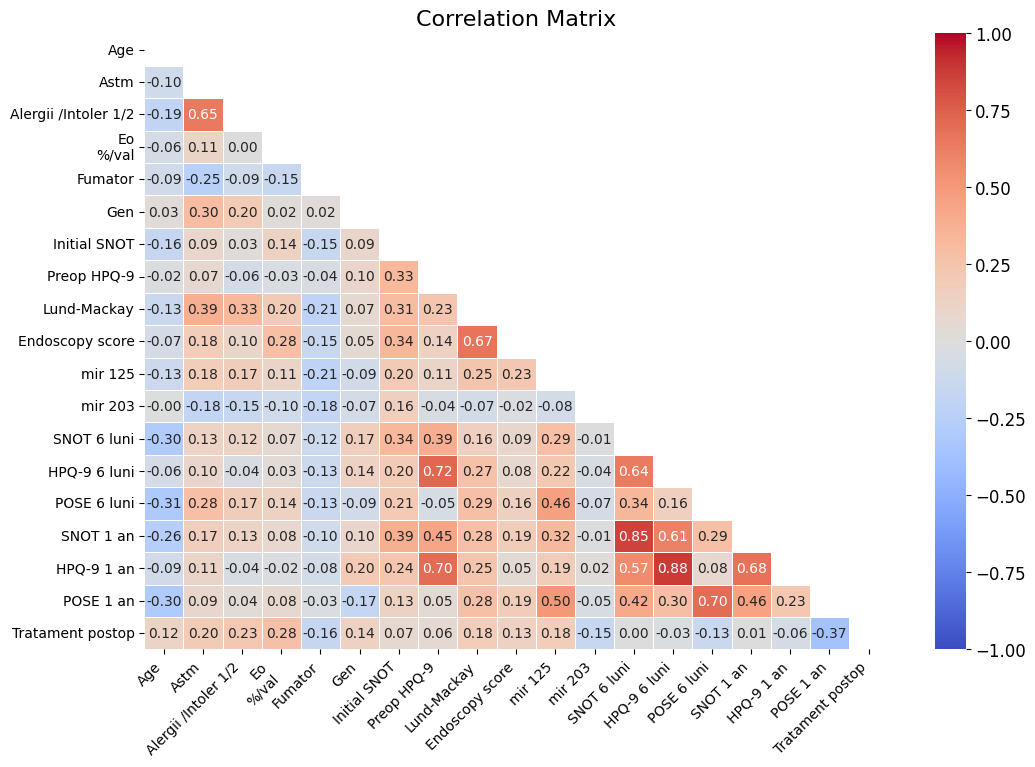

In [413]:
# Calculați matricea de corelație
corr_matrix = data.corr()

# Generați o mască(mask) pentru triunghiul superior
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Configurati matplotlib figure
plt.figure(figsize=(12, 8))

#Desenam heatmap cu masca și corelam raportul aspect ratio
heatmap = sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)

# Adaugam un titlu
plt.title('Correlation Matrix', fontsize=16)

# Rotitim etichetele pe axa x pentru o mai bună lizibilitate
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')

# Adaugam color bar
colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelsize=12)

# Vizualizare
#plt.tight_layout()
plt.show()

**ML pentru Pose 1 an**

Vom folosi urmatoatele campuri:

* Age
* Astm
* Alergii /Intoler 1/2
* Eo %/val
* Fumator
* Gen
* Initial SNOT
* Preop HPQ-9
* Lund-Mackay
* Endoscopy score
* mir 125
* mir 203
* SNOT 6 luni
* HPQ-9 6 luni
* SNOT 1 an
* HPQ-9 1 an
* Tratament postop

Vom elimina pe baza metricei urmatoarele elemente care au o corelare de peste 0.65:

* Astm
* Lund-Mackay
* HPQ-9 6 luni
* HPQ-9 1 an
* SNOT 6 luni
* POSE 6 luni

# Decision Tree classifier - POSE 1 an

In [414]:
#împărțim setul de date în features si target variable
feature_cols = ['Age', 'Astm', 'Eo\n%/val', 'Fumator', 'Gen', 'Initial SNOT', 'Preop HPQ-9',
                  'Lund-Mackay', 'mir 125', 'mir 203','Tratament postop']
X = data[feature_cols] # Features
y = data['POSE 1 an'] # Target variable
# împărțim setul de date in training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
train = clf.predict(X_train)
print(y_pred)


[2 1 1 1 1 2 2 2 1 1 1 1 1 1 2 2 2 1 1 1 1 4]


In [415]:
dt_accuracy = accuracy_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred, average='weighted')
dt_recall = recall_score(y_test, y_pred, average='weighted')
dt_f1 = f1_score(y_test, y_pred, average='weighted')

# Afisarea rezultatelor
print("Performanta modelului de Arbori de Decizie:")
print(f"Acuratețe: {dt_accuracy:.2f}")
print(f"Precision: {dt_precision:.2f}")
print(f"Exhaustivitate: {dt_recall:.2f}")
print(f"Scor F1: {dt_f1:.2f}")

Performanta modelului de Arbori de Decizie:
Acuratețe: 0.64
Precision: 0.68
Exhaustivitate: 0.64
Scor F1: 0.65


C:\Users\eu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\eu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [416]:
dt_accuracy_scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
dt_precision_scores = cross_val_score(clf, X, y, cv=10, scoring='precision_weighted')
dt_recall_scores = cross_val_score(clf, X, y, cv=10, scoring='recall_weighted')
dt_f1_scores = cross_val_score(clf, X, y, cv=10, scoring='f1_weighted')

dt_accuracy_mean = dt_accuracy_scores.mean()
dt_precision_mean = dt_precision_scores.mean()
dt_recall_mean = dt_recall_scores.mean()
dt_f1_mean = dt_f1_scores.mean()

print(f"Acuratețe: {dt_accuracy_mean:.2f}")
print(f"Precizia: {dt_precision_mean:.2f}")
print(f"Exhaustivitate: {dt_recall_mean:.2f}")
print(f"Scor F1: {dt_f1_mean:.2f}\n")

Acuratețe: 0.69
Precizia: 0.78
Exhaustivitate: 0.68
Scor F1: 0.70



C:\Users\eu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\eu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\eu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\eu

In [417]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[12  4  0  0]
 [ 2  2  0  0]
 [ 0  1  0  1]
 [ 0  0  0  0]]


In [418]:
#Vizualizam datele care au  fost prezise si cele reale
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
22,2,2
62,1,1
12,1,1
75,2,1
60,1,1
31,1,2
45,1,2
61,1,2
38,1,1
66,1,1


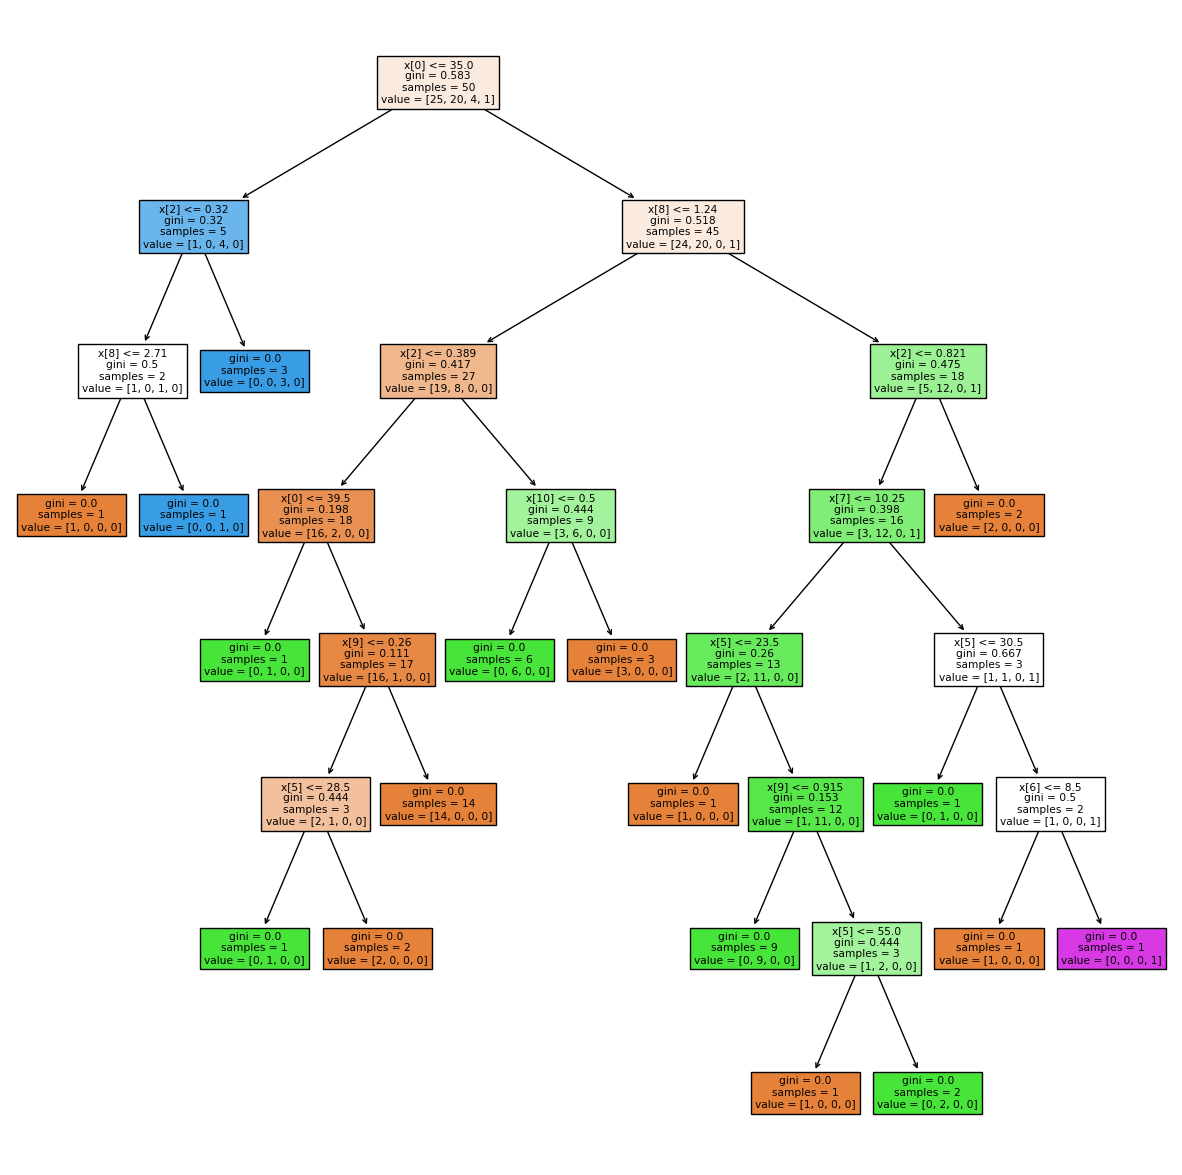

In [419]:
from sklearn import tree
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(clf, 
                  
                   filled=True)
fig.savefig("decistion_tree.png")

In [420]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Eo\n%/val           0.222368
Age                 0.203852
Initial SNOT        0.178942
mir 125             0.153432
Tratament postop    0.137174
mir 203             0.035975
Preop HPQ-9         0.034294
Lund-Mackay         0.033964
Astm                0.000000
Fumator             0.000000
Gen                 0.000000
dtype: float64

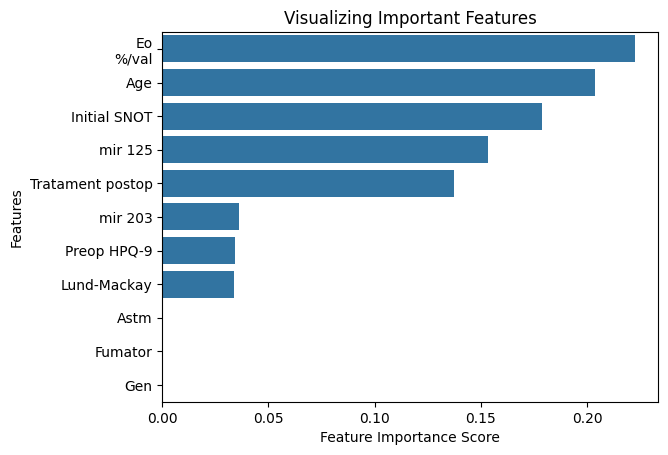

In [421]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)

# Adaugam labels 

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

# Adaugam titlu

plt.title("Visualizing Important Features")

# Visualizare

plt.show()

# Random Forest classifier - POSE 1 an

In [422]:
# Split the data into features (X) and target (y)
X = data[['Age', 'Astm', 'Eo\n%/val', 'Fumator', 'Gen', 'Initial SNOT', 'Preop HPQ-9',
                  'Lund-Mackay', 'mir 125', 'mir 203','Tratament postop']]  # Features
y = data['POSE 1 an'] # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the target values for the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy score and classification report to evaluate the model

dt_accuracy = accuracy_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred, average='weighted')
dt_recall = recall_score(y_test, y_pred, average='weighted')
dt_f1 = f1_score(y_test, y_pred, average='weighted')

# Afisarea rezultatelor
print("Performanta modelului de Arbori de Decizie:")
print(f"Acuratețe: {dt_accuracy:.2f}")
print(f"Precision: {dt_precision:.2f}")
print(f"Exhaustivitate: {dt_recall:.2f}")
print(f"Scor F1: {dt_f1:.2f}")




print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))



Performanta modelului de Arbori de Decizie:
Acuratețe: 0.82
Precision: 0.82
Exhaustivitate: 0.82
Scor F1: 0.81

Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.93      0.87        14
           2       0.80      0.57      0.67         7
           3       1.00      1.00      1.00         1

    accuracy                           0.82        22
   macro avg       0.87      0.83      0.84        22
weighted avg       0.82      0.82      0.81        22



In [423]:
print("Performanta modelului de Arbori de Decizie cu Corss validation:")

dt_accuracy_scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
dt_precision_scores = cross_val_score(clf, X, y, cv=10, scoring='precision_weighted')
dt_recall_scores = cross_val_score(clf, X, y, cv=10, scoring='recall_weighted')
dt_f1_scores = cross_val_score(clf, X, y, cv=10, scoring='f1_weighted')

dt_accuracy_mean = dt_accuracy_scores.mean()
dt_precision_mean = dt_precision_scores.mean()
dt_recall_mean = dt_recall_scores.mean()
dt_f1_mean = dt_f1_scores.mean()

print(f"Acuratețe: {dt_accuracy_mean:.2f}")
print(f"Precizia: {dt_precision_mean:.2f}")
print(f"Exhaustivitate: {dt_recall_mean:.2f}")
print(f"Scor F1: {dt_f1_mean:.2f}\n")

Performanta modelului de Arbori de Decizie cu Corss validation:
Acuratețe: 0.71
Precizia: 0.79
Exhaustivitate: 0.72
Scor F1: 0.75



C:\Users\eu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\eu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\eu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\eu

In [424]:
# Get feature importance
feature_importance = model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
0,Age,0.138555
1,Astm,0.014824
2,Eo\n%/val,0.090983
3,Fumator,0.030332
4,Gen,0.016144
5,Initial SNOT,0.118774
6,Preop HPQ-9,0.072748
7,Lund-Mackay,0.093291
8,mir 125,0.197980
9,mir 203,0.150302


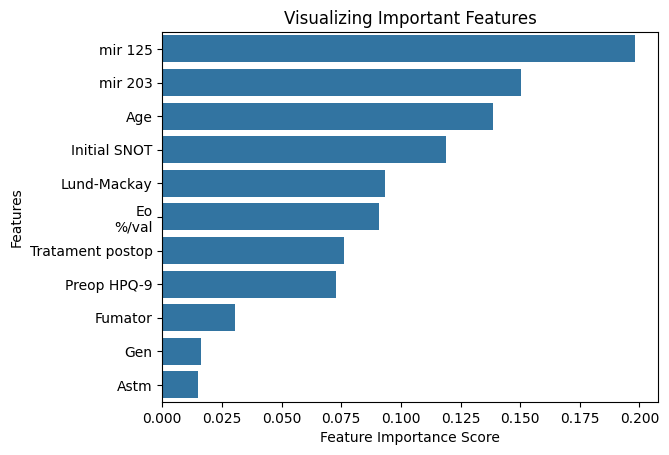

In [425]:
# Creating a seaborn bar plot

sns.barplot(y=feature_importance_df_sorted['Feature'], x=feature_importance_df_sorted['Importance'])

# Adaugam labels

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

# Adaugam un titlu

plt.title("Visualizing Important Features")

# Visualizare

plt.show()